In [3]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## data exploration 

we first try to understand which columns are sueful and which are not
Survivied is the target column that we want
Pclass , sex , age , sib sp , parch and embarked will be useful in this case
Should we change the age to a range?


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Here we can alr see the non-null objects in this info, we can see that there are some missing info in the age section, since age cannot be interpolated not filled up by average as it will skew the data, we will drop the data.
Cabin also should not be used since the data is too small and there are too many null values


In [6]:
df.drop('Cabin',axis='columns',inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [7]:
df_n = df.dropna()

In [8]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


Now the remanining rows all do not have null values and can be worked on

Now I want to change the age to a range of age so that it makes more sense to see whether the chances of survival is affected whether u are a child , adult or elderly

In [9]:
import numpy as np
bins = [0,15,25,55,np.inf]
names = ['child','youth','adult','elderly']
df_n['AgeRange'] = pd.cut(df_n['Age'],bins,labels=names)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


now we need to use onehotencoding to transform the values into labels


In [10]:
df_n = pd.concat((df_n,pd.get_dummies(df_n.AgeRange)),1)
df_n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange,child,youth,adult,elderly
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,youth,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,adult,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child,1,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,adult,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,child,1,0,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,child,1,0,0,0


In [11]:
df_n['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
df_n = pd.concat((df_n,pd.get_dummies(df_n.Embarked)),1)
df_n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange,child,youth,adult,elderly,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,youth,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,0,0,1,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,adult,0,0,1,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child,1,0,0,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,adult,0,0,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,child,1,0,0,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,child,1,0,0,0,0,0,1


Now we need to change the gender into labels via encoding or rather we can just map the value since it is binary

In [13]:
df_n['Sex_n'] = df_n['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [14]:
df_n.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange,child,youth,adult,elderly,C,Q,S,Sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,youth,0,1,0,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,0,0,1,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,0,0,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,0,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,0,0,1,0,0,0,1,1


Now we will take the useful ind var and put them into a var and the target in another var

In [15]:
y = df_n['Survived']
X = df_n[['Pclass','Sex_n','child','youth','adult','elderly','C','Q','S','SibSp','Parch']] # rmb it must be in dataframe form

In [16]:
X.head()

,Pclass,Sex_n,child,youth,adult,elderly,C,Q,S,SibSp,Parch
0,3,1,0,1,0,0,0,0,1,1,0
1,1,0,0,0,1,0,1,0,0,1,0
2,3,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,1,0
4,3,1,0,0,1,0,0,0,1,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test , y_train , y_test = train_test_split(X,y)

In [19]:
X_train.shape

(534, 11)

In [20]:
y_test.shape

(178,)

In [21]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
model.score(X_test,y_test)

0.797752808988764

In [34]:
y_pred =  model.predict(X_test)


Building a confusion matrix to see the results

In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print (TN, FP, FN, TP)

[[97  6]
 [30 45]]
97 6 30 45


Text(69.0, 0.5, 'Actual')

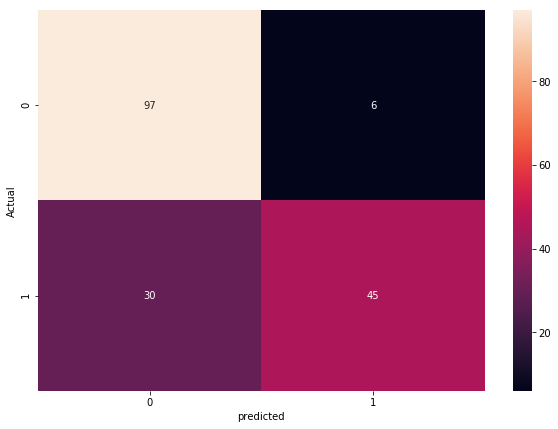

In [38]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True) # annot stands for annotation, whether to annotate each cell
plt.xlabel('predicted')
plt.ylabel('Actual')

In [40]:

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
# Accuracy is just the number of correct pred to total obs
# accuracy =  TP+TN/TP+FP+FN+TN
print ("Sensitivity: ", recall_score(y_test, y_pred))
# sensitivity is the number of TP among all the total positives
# sensitivity = TP / FN + TP
print ("Precision: ", precision_score(y_test, y_pred))
# precision is the nuber of TP among all the predicted positives
# precision = TP / TP + FP

# precision and sensitivity depends on situation


Accuracy:  0.797752808988764
Sensitivity:  0.6
Precision:  0.8823529411764706


In our case, a low sensitivity is okay because we would rather be precise and be coreect about who has survived. It is okay to have a high False negative and low false positives

In [26]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

Logistic Regression will be used and to compare which is a better model

In [27]:
model2.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
model2.score(X_test,y_test)

0.8033707865168539

In [41]:
y_pred = model2.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(cm)
print (TN, FP, FN, TP)

[[95  8]
 [27 48]]
95 8 27 48


Text(69.0, 0.5, 'Actual')

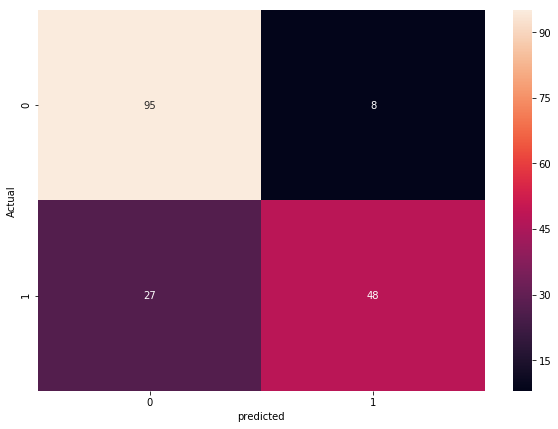

In [45]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True) # annot stands for annotation, whether to annotate each cell
plt.xlabel('predicted')
plt.ylabel('Actual')

In [46]:

# Performance of decision tree model
print ("Accuracy: ", accuracy_score(y_test, y_pred))
# Accuracy is just the number of correct pred to total obs
# accuracy =  TP+TN/TP+FP+FN+TN
print ("Sensitivity: ", recall_score(y_test, y_pred))
# sensitivity is the number of TP among all the total positives
# sensitivity = TP / FN + TP
print ("Precision: ", precision_score(y_test, y_pred))
# precision is the nuber of TP among all the predicted positives
# precision = TP / TP + FP

# precision and sensitivity depends on situation

Accuracy:  0.8033707865168539
Sensitivity:  0.64
Precision:  0.8571428571428571


In general, we can see that logistic regression does a better job than decision tree in this aspect, we can choose to finetune the tree to get a higher accuracy 